---
Material for the course "Photonics systems and devices"

The following notes written by SERGIO G RODRIGO (2021-2022)</font> 

---

- *Use google colab to see the Notebook index*
- *See classes and functions/methods descriptions calling name_class.__doc__; name_method.__doc__*
- *Notation and equations from "Optical Waveguide Theory", A.W. Snyder and
J. Love Springer, Boston, MA (1983) 1st Ed https://doi.org/10.1007/978-1-4613-2813-1*
- The chapters, pages, figures and tables of Snyder&Love are used to describe optical fiber parameters, field definitions, dispersion relation definitions...

# Description

Modal properties of the step-profile fiber from analytical expressions in Snyder&Love, Section 12-10 Table 12-5. 

# Google access

In [ ]:
#Your google drive is made accesible to Colab.
try:
    from google.colab import drive 
    drive.mount('/content/drive/')
    # The working directory
    %cd "/content/drive/MyDrive/docencia_2021-2022/dispositivos_fotónicos/python/optical_fiber"
    %ls -lht 
    # To import own packages set local path in packages syspath
    import sys
    sys.path.insert(0,"./")
except ImportError:
    print("You are not in google.colab!!")    
    pass

Mounted at /content/drive/
/content/drive/MyDrive/docencia_2021-2022/dispositivos_fotónicos/python/optical_fiber
total 2.4M
-rw------- 1 root root  89K Mar 24 09:37 ofiber_modal_properties.ipynb
-rw------- 1 root root  19K Mar 21 20:50 OFiber_chromatic_dispersionUntitled0.ipynb
-rw------- 1 root root 609K Mar 16 09:00 ofiber_em_fields.ipynb
-rw------- 1 root root 185K Mar  9 16:06 ofiber_plot_dispersion_relation.ipynb
-rw------- 1 root root 192K Mar  9 15:57 pwaveguide_em_fields.ipynb
-rw------- 1 root root 8.8K Mar  9 14:54 ofiber_class_description.ipynb
-rw------- 1 root root  14K Mar  9 11:55 lambdavsbetafig12-4_Snyder_Love.csv
-rw------- 1 root root  14K Mar  9 11:55 omegavsbetafig12-4_Snyder_Love.csv
drwx------ 2 root root 4.0K Mar  9 08:57 Optical-Fiber/
-rw------- 1 root root 205K Mar  7 19:58 pwaveguide_plot_dispersion_relation.ipynb
-rw------- 1 root root 105K Mar  7 18:19 pwaveguide_calc_dispersion_relation.ipynb
-rw------- 1 root root 9.1K Mar  4 19:39 OFiber_plot.py
-rw----

# Physics constants


In [ ]:
c0= 299792458.0 #m/s
eps0= 8.854187817e-12    #F·m-1 
mu0= 1.0/(eps0*(c0**2)) #N·A-2
con_wltoeV=1239.828330

# Auxiliary functions for plotting

In [ ]:
from OFiber_plot import plot_frac_energy,plot_vg

# Auxiliary functions for finding EM mode solutions

In [ ]:
from OFiber_find import find_EM_modes,\
                        find_EM_modes_loop

# Optical fiber Class (step-profile)

In [ ]:
from OFiber_class import OFiber

# Optical fiber Class (EM fields)

In [ ]:
from OFiber_fields import EMfield

#Step-profile optical fiber (choose one of the following options)

+ *NOTE*: run just one of the options at time. The mode labels are different if you choose one or other option. Exact modes labels ($HE_{11}$...) for Option 1. Weakly guiding aproximation labels for modes ($LP_{01}$...) for Option 2.




### Option 1: High index contrast waveguide. Definition of the OFiber through $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ 

In [ ]:
'''
Radious has been chosen so the wavelength range of operation 
for both waveguides will be the same. Therefore:
rhow=of.rho*np.sqrt(of.nco**2-of.ncl**2)/np.sqrt(ofw.nco**2-ofw.ncl**2)
print("rho for weakly guinding from high index waveguide",rhow)
'''

'''
High index contrast waveguides
(see Fig. 12-4 Snyder&Love)
'''
rho=0.2 #micras
nco=2.5
delta=0.32  
of=OFiber(rho,nco=nco,delta=delta)
# Dispersion relation V vs U file 
file_name = 'fig12-4_Snyder_Love.csv'      
of.import_dispersion_relation(file_name)
print(of)

modes_dict={'HE11':['hybrid',1],'TE01':['TE',0],'HE21':['hybrid',2],
            'TM01':['TM',0],'EH11':['hybrid',1],'HE31':['hybrid',3],
            'HE12':['hybrid',1]}

rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0


### Option 2: weakly guiding waveguide ($\Delta \lll 1$). Definition of the OFiber through $n_{co}$,$n_{cl}$, $\Delta$, $\rho$ 

In [ ]:
'''
Weakly guiding waveguides
(see Fig. 14-4 Snyder&Love)
'''
rho=2.4226 #micras
ncl=1.45
delta=0.0064
of=OFiber(rho,ncl=ncl,delta=delta)
# Dispersion relation V vs U file 
file_name = 'weak_fig14-4_Snyder_Love.csv'    
of.import_dispersion_relation(file_name)
print(of)

modes_dict={'LP01':['hybrid',1],'LP11':['TM',0],'LP21':['hybrid',1],
            'LP02':['hybrid',1]}

rho (microns)= 2.4226; nco= 1.4593700490391102; ncl= 1.45; $\Delta$= 0.0064;
 V-U=
           V      LP01  LP21  LP02  LP11
0  1.000000  0.000000   0.0   0.0   0.0
1  1.183673  1.123515   0.0   0.0   0.0
2  1.367347  1.244066   0.0   0.0   0.0
3  1.551020  1.344846   0.0   0.0   0.0
4  1.734694  1.429691   0.0   0.0   0.0


## Modal properties high index contrast waveguides

### Fraction of power in the core

          V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


No individual values of power fraction given.


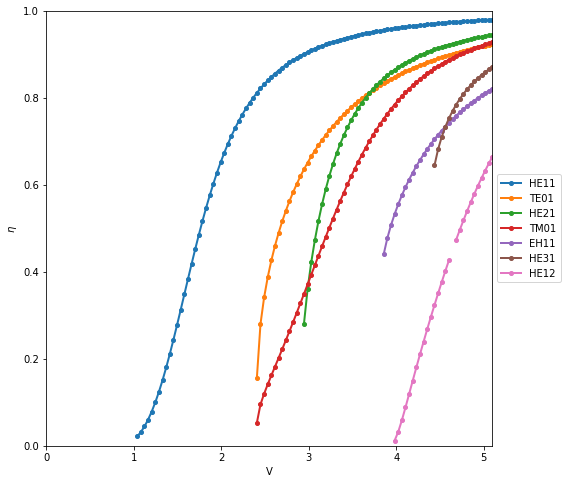

In [ ]:
import matplotlib.pyplot as plt

df=of.dr
print(df.head())    

frac_power,mode_labels=[],[]
for name,mode in modes_dict.items():
  frac_mode=df[name].replace([0.0],-10.0) # Exclude U=0 from plotting  
  mode_labels.append(frac_mode.name)        
  frac_power.append(of.frac_power_core(frac_mode,df['V'],nu=mode[1],mode=mode[0]))

#Plot
plot_frac_energy(df,frac_power,mode_labels=mode_labels,
                 markersize=4.0,linewidth=2.0,Vmax=max(df['V']))

### Group velocity

rho (microns)= 0.2; nco= 2.5; ncl= 1.5; $\Delta$= 0.32;
 V-U=
           V      HE11  EH11  HE12  HE21  HE31  TE01  TM01
0  1.000000  0.000000   0.0   0.0   0.0   0.0   0.0   0.0
1  1.041414  1.039845   0.0   0.0   0.0   0.0   0.0   0.0
2  1.082828  1.080246   0.0   0.0   0.0   0.0   0.0   0.0
3  1.124242  1.120212   0.0   0.0   0.0   0.0   0.0   0.0
4  1.165657  1.159639   0.0   0.0   0.0   0.0   0.0   0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


No individual values of power fraction given.


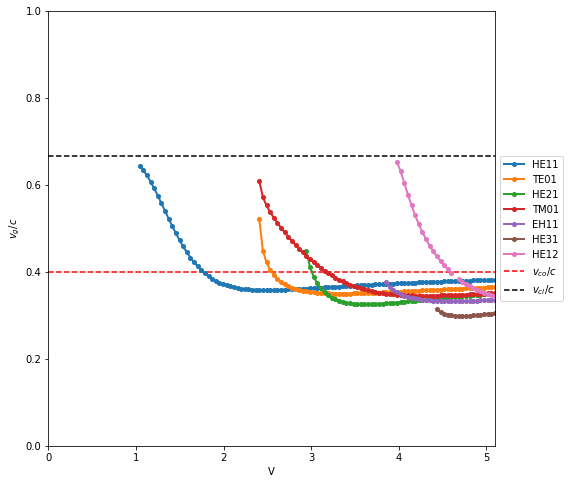

In [ ]:
# Check the OFiber instance
print(of)

vg,mode_labels=[],[]
for name,mode in modes_dict.items():
  U_mode = df[name].replace([0.0],-10.0) # Exclude U=0 from plotting  
  mode_labels.append(U_mode.name)    
  vg.append(of.v_group(U_mode,df['V'],nu=mode[1],mode=mode[0]))

#Plot
plot_vg(of,df,vg,mode_labels=mode_labels,
        markersize=4.0,linewidth=2.0,Vmax=max(df['V']))